In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cell 2: Load the dataset
file_path = "River.csv"  
data = pd.read_csv(file_path)

# Cell 3: Initial exploration
print("Dataset Shape:", data.shape)
print("\nDataset Columns:", data.columns)
print("\nDataset Info:")
data.info()
print("\nFirst 5 rows of the dataset:")
print(data.head())

Dataset Shape: (128978, 9)

Dataset Columns: Index(['Index', 'pH', 'Nitrate', 'Color', 'Turbidity', 'Odor', 'Chlorine',
       'Total Dissolved Solids', 'Target'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128978 entries, 0 to 128977
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Index                   128978 non-null  int64  
 1   pH                      126457 non-null  float64
 2   Nitrate                 126728 non-null  float64
 3   Color                   128844 non-null  object 
 4   Turbidity               127865 non-null  float64
 5   Odor                    125268 non-null  float64
 6   Chlorine                127705 non-null  float64
 7   Total Dissolved Solids  128940 non-null  float64
 8   Target                  128978 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 8.9+ MB

First 5 rows of the dataset:
   

In [3]:
# Cell 4: Filter relevant columns for analysis
columns_of_interest = ['pH', 'Nitrate', 'Color', 'Turbidity', 'Odor', 'Chlorine', 'Total Dissolved Solids', 'Target']
filtered_data = data[columns_of_interest]

# Cell 5: Handle missing data if any
filtered_data.isnull().sum()  # Check for missing values
filtered_data = filtered_data.dropna()  # Drop rows with missing values

<class 'pandas.core.frame.DataFrame'>
Index: 118290 entries, 0 to 128977
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      118290 non-null  float64
 1   Nitrate                 118290 non-null  float64
 2   Color                   118290 non-null  int32  
 3   Turbidity               118290 non-null  float64
 4   Odor                    118290 non-null  float64
 5   Chlorine                118290 non-null  float64
 6   Total Dissolved Solids  118290 non-null  float64
 7   Target                  118290 non-null  int64  
dtypes: float64(6), int32(1), int64(1)
memory usage: 7.7 MB


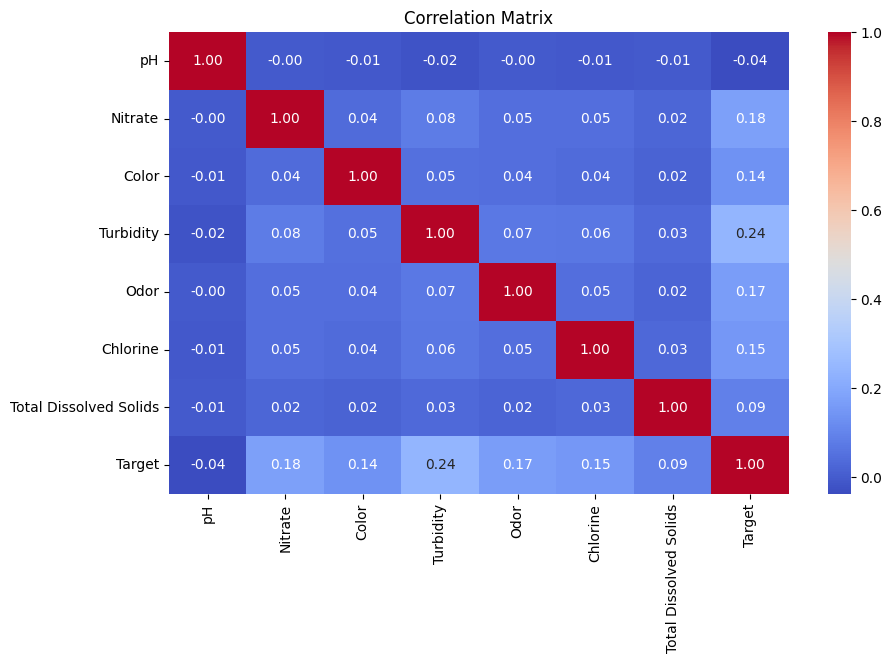

In [4]:
# Convert categorical columns to numeric (e.g., 'Color' column)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
filtered_data['Color'] = label_encoder.fit_transform(filtered_data['Color'])

# Check if the data is now numeric
filtered_data.info()

# Cell 6: Data visualization - Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Mean Squared Error: 0.1534
R-squared: 0.1373
Accuracy (within ±0.02 of actual values): 2.77%


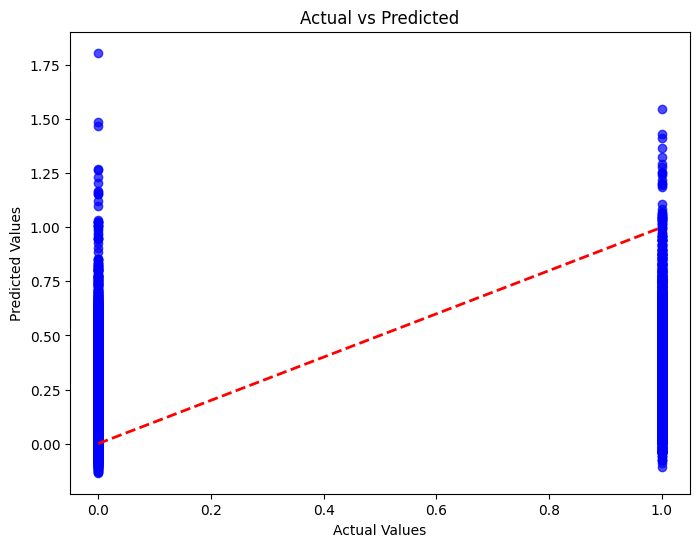

In [5]:
# Cell 7: Split the data into features and target
X = filtered_data.drop('Target', axis=1)
y = filtered_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cell 8: Build and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Cell 9: Evaluate the model
y_pred = lr_model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Define a threshold for "accuracy"
threshold = 0.1 * y_test.mean()  # 10% of the mean of the target
accuracy = np.mean(np.abs(y_test - y_pred) <= threshold) * 100  # Percentage of predictions within the threshold

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Accuracy (within ±{threshold:.2f} of actual values): {accuracy:.2f}%")

# Cell 10: Visualization of predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
